# Credit Card Fraud Detection
#### In this notebook a model is built to detect fraudulent credit card transactions using a dataset containing information about credit card transactions, and algorithms like Logistic Regression, Decision Trees, or Random Forests.

## Installing & Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Data Loading & Framing

In [ ]:
df = pd.read_csv("/content/Credit.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,537,-1.097278,1.094348,2.074334,-0.085776,-0.200635,-0.424142,0.575308,0.106945,-0.278105,...,-0.080692,-0.055630,-0.132471,0.410348,0.181198,0.295576,0.395454,0.197642,27.34,0
1204,538,-0.636011,-0.303838,1.215343,0.308924,0.561377,0.296560,0.862485,-0.406401,-0.084263,...,-0.155456,0.143292,-0.013619,-0.214473,-1.093307,0.396991,-0.109662,-0.345634,158.00,0
1205,539,-1.054584,0.671513,2.106718,-0.591701,0.228368,-0.053748,0.941606,-0.191062,0.267565,...,-0.049688,0.137518,-0.420259,0.130488,0.482469,0.394143,-0.409756,-0.179564,35.64,0
1206,539,-0.420050,1.034648,1.565850,-0.029643,-0.054336,-0.907983,0.688436,-0.063128,-0.389635,...,-0.228282,-0.598231,-0.023081,0.360199,-0.194316,0.071640,0.265159,0.121071,1.29,0


## Data Pre-Processing
### a) For Train set

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
df.Class.value_counts()

,count
Class,
0,716
1,492


In [ ]:
x = df.drop(columns='Class', axis=1)
y = df['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Modeling
Next models have been built and their accuracies have been computed to select a best model.
### Logistic Regression

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

966
242
966
242


In [ ]:
LR = LogisticRegression(solver='liblinear')

LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions = LR.predict(x_test)

In [ ]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)

print(LR_Accuracy_Score)

1.0


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       109

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



### Decision Tree

In [ ]:
Tree = DecisionTreeClassifier(max_depth=2)


Tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

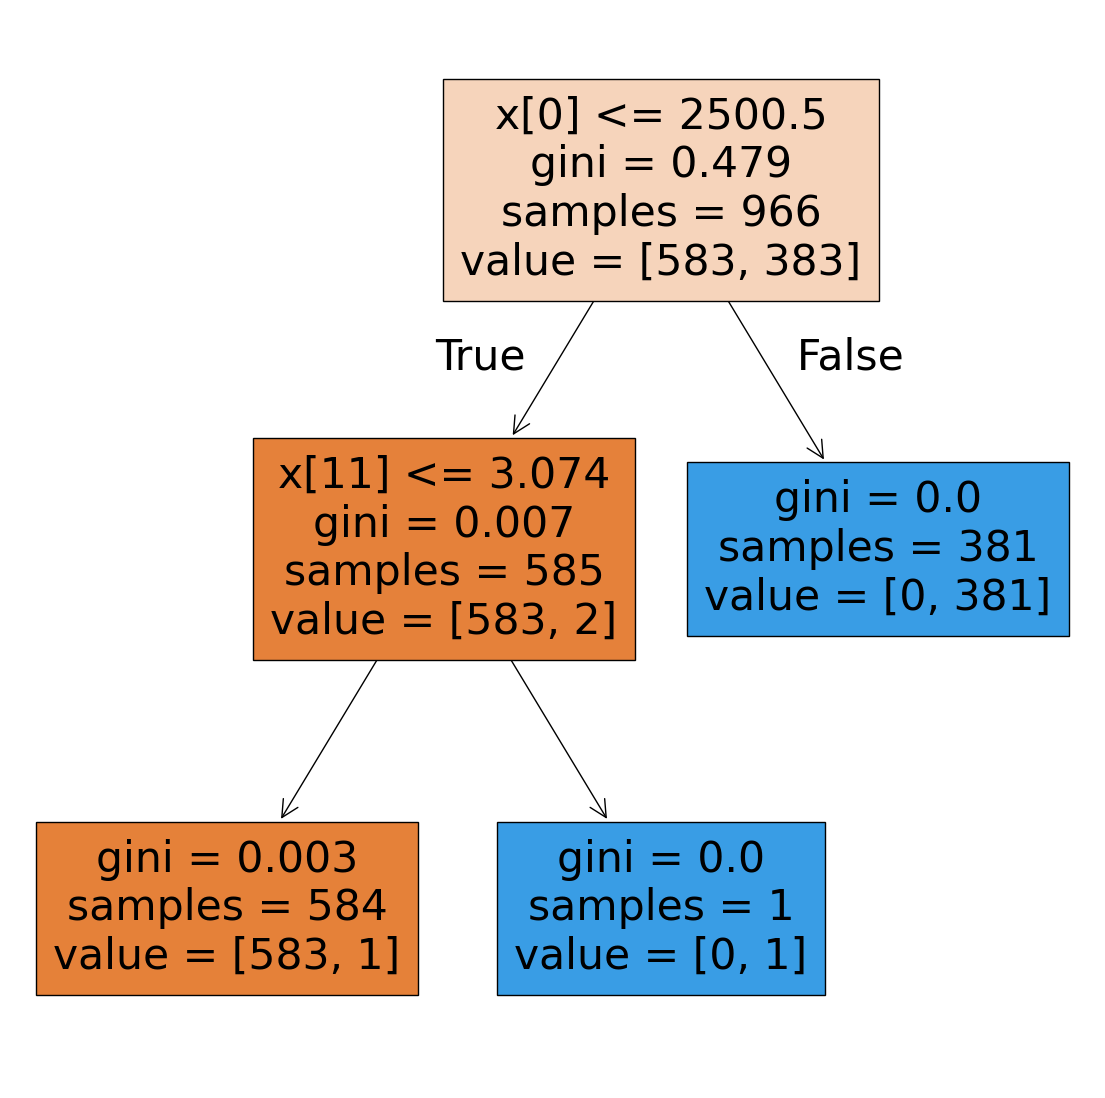

In [ ]:
from sklearn import tree
plt.figure(figsize=(14, 14))
tree.plot_tree(Tree,filled=True)
plt.show()

In [ ]:
predictions = Tree.predict(x_test)

In [ ]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)


print(Tree_Accuracy_Score)
print(Tree_JaccardIndex)
print(Tree_F1_Score)

1.0
1.0
1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       109

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
predictions = knn.predict(x_test)

In [ ]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

print(KNN_Accuracy_Score)
print(KNN_JaccardIndex)
print(KNN_F1_Score)

1.0
1.0
1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       109

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

